In [1]:
import os
#import pybiomart
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from skimage import io
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import loompy
import anndata
import igraph
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#import rpy2.robjects as robj
import scanpy as sc
import scipy
import scipy.optimize
import scvelo as scv
import sklearn
import velocyto as vcy

from collections import Counter
from IPython.core.display import display, HTML
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist, squareform

matplotlib.rcParams.update({'font.size': 12})
%config InlineBackend.figure_format = 'retina'

In [2]:
os.chdir('/Users/connerkummerlowe/Dropbox (MIT)/eed_dedifferentiation/velocity files/')

# Moving metadata to kallisto aligned samples

In [5]:
adata = sc.read("adata_collapsed.h5ad")
paga = sc.read("../../Zambia/reseq_analysis/pseudotime/epi_paga.h5ad")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
paga.var_names_make_unique()
paga.obs.head()

,Age,BMI,ClusterID,ClusterName,HAART,HIV_HTLV_,Height,SCT_snn_res_0_2,SCT_snn_res_0_4,SCT_snn_res_0_8,...,tier2,tier3,tier4,update_confocal_cell_dropout,update_confocal_cell_junction_enhancement,update_confocal_fluorescein_leak,update_confocal_score,update_confocal_total,v_c_ratio,vhmean
AGCACTACGAGC_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,Ent,Ent APOA,Ent APOA PCK1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTGAACACACCG_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,Ent,Ent APOA,Ent APOA PCK1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GAAGCGAGAGGG_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,50.0,0.0,2,1,NA,N,0.0,1,1,3,...,Ent,Ent SI,Ent SI,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATGAGTCTCAAT_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,Ent,Ent APOA,Ent APOA PCK1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAGCGGCTGTTA_1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,Ent,Ent APOA,Ent APOA PCK1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
paga.obs.index = paga.obs.index.str.split('_').str[0]
paga.obs['bcs'] = paga.obs.index
paga.obs['patient_as_str'] = paga.obs.patient.str.split('-').str[0] 
paga.obs['barcode'] = paga.obs['bcs'] + '.' + paga.obs['patient_as_str']
paga.obs.index = paga.obs.barcode

In [8]:
paga.obs.head()

,Age,BMI,ClusterID,ClusterName,HAART,HIV_HTLV_,Height,SCT_snn_res_0_2,SCT_snn_res_0_4,SCT_snn_res_0_8,...,update_confocal_cell_dropout,update_confocal_cell_junction_enhancement,update_confocal_fluorescein_leak,update_confocal_score,update_confocal_total,v_c_ratio,vhmean,bcs,patient_as_str,barcode
barcode,,,,,,,,,,,,,,,,,,,,,
AGCACTACGAGC.0128,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AGCACTACGAGC,0128,AGCACTACGAGC.0128
GTGAACACACCG.0128,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GTGAACACACCG,0128,GTGAACACACCG.0128
GAAGCGAGAGGG.0128,50.0,0.0,2,1,NA,N,0.0,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAAGCGAGAGGG,0128,GAAGCGAGAGGG.0128
ATGAGTCTCAAT.0128,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ATGAGTCTCAAT,0128,ATGAGTCTCAAT.0128
CAGCGGCTGTTA.0128,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAGCGGCTGTTA,0128,CAGCGGCTGTTA.0128


In [9]:
adata.obs['barcode'] = adata.obs.index.str[:-1]
adata.obs.head()

,run,bcs,batch,barcode
AAAAAAAAAAAA.0115D,0115D,AAAAAAAAAAAA,0,AAAAAAAAAAAA.0115
AAAAAAAAAAAG.0115D,0115D,AAAAAAAAAAAG,0,AAAAAAAAAAAG.0115
AAAAAAAGGCCG.0115D,0115D,AAAAAAAGGCCG,0,AAAAAAAGGCCG.0115
AAAAAAGGCAAC.0115D,0115D,AAAAAAGGCAAC,0,AAAAAAGGCAAC.0115
AAAAACGTAGTT.0115D,0115D,AAAAACGTAGTT,0,AAAAACGTAGTT.0115


In [10]:
final = adata[adata.obs.barcode.isin(paga.obs.barcode),:]

In [11]:
final

View of AnnData object with n_obs × n_vars = 10299 × 58347
    obs: 'run', 'bcs', 'batch', 'barcode'
    layers: 'spliced', 'unspliced'

In [12]:
final.obs.index = final.obs.index.str[:-1]

In [13]:
final.layers["ambiguous"] = scipy.sparse.csr_matrix(np.zeros(final.X.shape))
final.var_names_make_unique()
paga.obs_names_make_unique()
final.obs["Clusters"] = final.obs.index.map(paga.obs['tier4'])

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [14]:
final.var["Accession"] = final.var.index

In [15]:
paga.obs

,Age,BMI,ClusterID,ClusterName,HAART,HIV_HTLV_,Height,SCT_snn_res_0_2,SCT_snn_res_0_4,SCT_snn_res_0_8,...,update_confocal_cell_dropout,update_confocal_cell_junction_enhancement,update_confocal_fluorescein_leak,update_confocal_score,update_confocal_total,v_c_ratio,vhmean,bcs,patient_as_str,barcode
barcode,,,,,,,,,,,,,,,,,,,,,
AGCACTACGAGC.0128,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AGCACTACGAGC,0128,AGCACTACGAGC.0128
GTGAACACACCG.0128,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GTGAACACACCG,0128,GTGAACACACCG.0128
GAAGCGAGAGGG.0128,50.0,0.0,2,1,NA,N,0.0,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAAGCGAGAGGG,0128,GAAGCGAGAGGG.0128
ATGAGTCTCAAT.0128,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ATGAGTCTCAAT,0128,ATGAGTCTCAAT.0128
CAGCGGCTGTTA.0128,50.0,0.0,4,3,NA,N,0.0,3,4,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAGCGGCTGTTA,0128,CAGCGGCTGTTA.0128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCCGTACCCAGA.0115,66.0,0.0,3,2,NA,N,0.0,2,3,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GCCGTACCCAGA,0115,GCCGTACCCAGA.0115
TCCCCATTTATG.0115,66.0,0.0,4,3,NA,N,0.0,3,4,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCCCCATTTATG,0115,TCCCCATTTATG.0115
ACGACGTGTTGC.0115,66.0,0.0,1,0,NA,N,0.0,0,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ACGACGTGTTGC,0115,ACGACGTGTTGC.0115


In [16]:
final.obs['orig.ident'] = final.obs.index.map(paga.obs['orig_ident'])
final.obs['study'] = final.obs.index.map(paga.obs['study'])
final.obs['region'] = final.obs.index.map(paga.obs['region'])
final.obs['HIV.HTLV.'] = final.obs.index.map(paga.obs['HIV_HTLV_'])

In [17]:
final.write("final_merged_sept29.h5ad")

... storing 'barcode' as categorical


In [18]:
final.write_loom("final_merged_sept29.loom")

In [19]:
final.obs['Clusters'].value_counts()

Ent APOA ALPI          2525
Ent SI                 2130
Stem cycling            985
Stem OLFM4              975
Ent HIV IFN             714
Bulb FABP1              607
Stem OLFM4 LGR5         550
Ent APOA PCK1           449
Secretory precursor     263
Goblet                  178
BEST4                   147
Bulb PTMA               144
Tuft                    138
Brunner gland            81
EEC X                    70
Bulb OLFM4               70
Paneth                   65
Enterochromaffin         44
Bulb TFF2 LYZ            43
EEC S                    42
EEC I & L                36
EEC K                    23
EEC Delta                20
Name: Clusters, dtype: int64

In [20]:
final_1_list = ['Stem OLFM4 LGR5'.'Stem OLFM4','Stem cycling', ]
final_2_list = ['8 Stem', '10 Ent Dedifferentiation','11 Ent FABP','12 Ent MT', '13 Ent Precursor OLFM4', '14 Ent SI', '9 Ent APOA']

SyntaxError: invalid syntax (<ipython-input-20-7f2d0f03bc6f>, line 1)

# Running Velcyto

In [3]:
cell_type_colors = pd.read_csv("../../Zambia/reseq_analysis/cell_type_colors.csv")['x'].values.tolist()

In [4]:
# Color palette for clusters
# colorsnola2 = np.array([ '#bcf60c', '#f58231', '#911eb4','#e6194b', '#3cb44b', '#ffe119',  '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000','#46f0f0', '#f032e6','#4363d8',  '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000'])
colorsnola2 = sns.color_palette("hls", 23)

In [5]:
colorsnola2 = cell_type_colors

In [6]:
ann_obj = vcy.VelocytoLoom("final_merged_sept29.loom")

In [7]:
labels = ann_obj.ca['Clusters']
manual_annotation = {str(i):[i] for i in labels}
annotation_dict = {v:k for k, values in manual_annotation.items() for v in values }
clusters = np.array([annotation_dict[i] for i in labels])
i = 0
cluster_colors_dict = {}
for k,v in manual_annotation.items():
    cluster_colors_dict[k] = colorsnola2[i]
    i+=1
ann_obj.set_clusters(clusters, cluster_colors_dict)

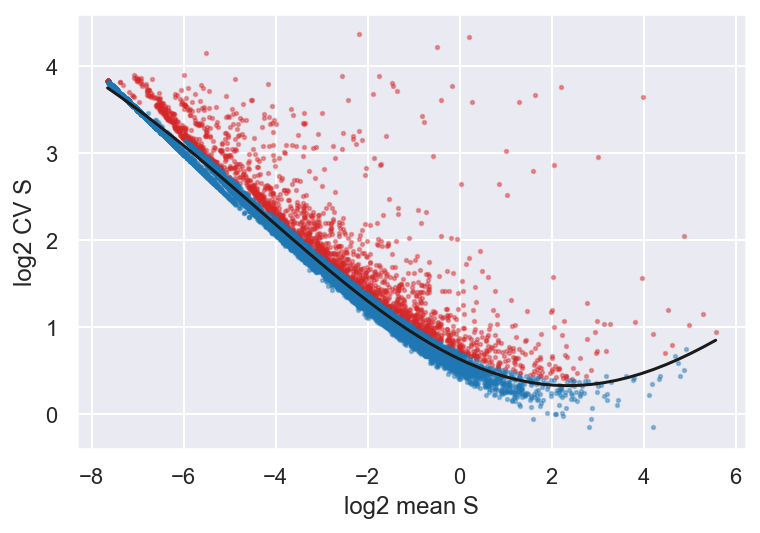

In [8]:
# Normalizing Spliced and Unspliced reads
ann_obj.normalize("S", size=True, log=False)
ann_obj.normalize("U", size=True,  log=False)
#Scoring and filtering genes
ann_obj.score_detection_levels(min_expr_counts=30, min_cells_express=20,
                           min_expr_counts_U=0, min_cells_express_U=0)
ann_obj.filter_genes(by_detection_levels=True)
ann_obj.score_cv_vs_mean(2000, plot=True, max_expr_avg=50, winsorize=True, winsor_perc=(1,99.8), svr_gamma=0.01, min_expr_cells=50)
ann_obj.filter_genes(by_cv_vs_mean=True)
ann_obj.score_detection_levels(min_expr_counts=0, min_cells_express=0,
                           min_expr_counts_U=25, min_cells_express_U=20)

In [9]:
ann_obj.score_cluster_expression(min_avg_U=0.007, min_avg_S=0.06)
ann_obj.filter_genes(by_detection_levels=True, by_cluster_expression=True)
ann_obj.normalize_by_total(min_perc_U=0.5)
ann_obj.adjust_totS_totU(normalize_total=True, fit_with_low_U=False, svr_C=1, svr_gamma=1e-04)
ann_obj.perform_PCA()
n_comps = np.where(np.diff(np.diff(np.cumsum(ann_obj.pca.explained_variance_ratio_))>0.0055))[0][0]

nn = NearestNeighbors(50)
nn.fit(ann_obj.pcs[:,:4])
knn_pca = nn.kneighbors_graph(mode='distance')
knn_pca = knn_pca.tocoo()
G = igraph.Graph(list(zip(knn_pca.row, knn_pca.col)), directed=False, edge_attrs={'weight': knn_pca.data})
VxCl = G.community_multilevel(return_levels=False, weights="weight")
labels = np.array(VxCl.membership)
k = 550 
ann_obj.knn_imputation(n_pca_dims=n_comps, k=k)
ann_obj.normalize_median()
ann_obj.fit_gammas(maxmin_perc=[2,95], limit_gamma=True)
ann_obj.normalize(which="imputed", size=False, log=True)
ann_obj.Pcs = np.array(ann_obj.pcs[:,:2], order="C")
ann_obj.predict_U()
ann_obj.calculate_velocity()
ann_obj.calculate_shift()
ann_obj.extrapolate_cell_at_t(delta_t=1)
ann_obj.estimate_transition_prob(hidim="Sx_sz", embed="Pcs", transform="log", psc=1,
                             n_neighbors=150, knn_random=True, sampled_fraction=1)
ann_obj.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=False)
ann_obj.calculate_grid_arrows(smooth=0.9, steps=(25, 25), n_neighbors=200)

In [28]:
ann_obj.dump_hdf5("final_velocyto_sept29")

AttributeError: 'VelocytoLoom' object has no attribute 'dump_hdf5'

In [10]:
cluster_names_in_order = pd.read_csv("../../Zambia/reseq_analysis/pseudotime/epi_names.txt")['x'].values

In [22]:
labels[np.equal(labels,"Brunner gland")] = "Surface mucosal"
labels[np.equal(labels,"Bulb TFF1 GKN1")] = "Surface mucosal"
labels[np.equal(labels,"Bulb OLFM4")] = "Foveolar precursor"
labels[np.equal(labels,"Bulb TFF2 LYZ")] = "Mucosal neck"
labels[np.equal(labels,"Bulb FABP1")] = "Epi FABP1 CD55"
labels[np.equal(labels,"Bulb PTMA")] = "Epi FABP1 PTMA"
labels[np.equal(labels,"Ent HIV IFN")] = "Ent ISG15 IFI6"
labels[np.equal(labels,"BEST4")] = "Ent BEST4"

In [14]:
cluster_names_in_order

array(['Stem OLFM4 LGR5', 'Stem OLFM4', 'Stem cycling', 'Ent SI',
       'Ent APOA ALPI', 'Ent APOA PCK1', 'Ent HIV IFN', 'BEST4',
       'Secretory precursor', 'EEC Delta', 'EEC I & L', 'EEC K', 'EEC S',
       'EEC X', 'Enterochromaffin', 'Goblet', 'Paneth', 'Tuft',
       'Brunner gland', 'Bulb FABP1', 'Bulb OLFM4', 'Bulb PTMA',
       'Bulb TFF2 LYZ'], dtype=object)

In [27]:
cluster_names_in_order[6] = "Ent ISG15 IFI6"
cluster_names_in_order[7] = "Ent BEST4"
cluster_names_in_order[18] = "Surface mucosal"
cluster_names_in_order[19] = "Epi FABP1 CD55"
cluster_names_in_order[20] = "Foveolar precursor"
cluster_names_in_order[21] = "Epi FABP1 PTMA"
cluster_names_in_order[22] = "Mucosal neck"

In [16]:
cluster_names_in_order

array(['Stem OLFM4 LGR5', 'Stem OLFM4', 'Stem cycling', 'Ent SI',
       'Ent APOA ALPI', 'Ent APOA PCK1', 'Ent ISG15 IFI6', 'BEST4',
       'Secretory precursor', 'EEC Delta', 'EEC I & L', 'EEC K', 'EEC S',
       'EEC X', 'Enterochromaffin', 'Goblet', 'Paneth', 'Tuft',
       'Surface mucosal', 'Epi FABP1 CD55', 'Mucosal precursor',
       'Epi FABP1 PTMA', 'Mucosal neck'], dtype=object)

In [17]:
annotation_dict

{'Stem cycling': 'Stem cycling',
 'Ent APOA PCK1': 'Ent APOA PCK1',
 'Ent SI': 'Ent SI',
 'Ent APOA ALPI': 'Ent APOA ALPI',
 'BEST4': 'BEST4',
 'Goblet': 'Goblet',
 'EEC X': 'EEC X',
 'Secretory precursor': 'Secretory precursor',
 'EEC Delta': 'EEC Delta',
 'Stem OLFM4 LGR5': 'Stem OLFM4 LGR5',
 'Tuft': 'Tuft',
 'Stem OLFM4': 'Stem OLFM4',
 'Enterochromaffin': 'Enterochromaffin',
 'Bulb FABP1': 'Bulb FABP1',
 'EEC K': 'EEC K',
 'EEC I & L': 'EEC I & L',
 'Bulb PTMA': 'Bulb PTMA',
 'Brunner gland': 'Brunner gland',
 'Bulb OLFM4': 'Bulb OLFM4',
 'Ent HIV IFN': 'Ent HIV IFN',
 'EEC S': 'EEC S',
 'Bulb TFF2 LYZ': 'Bulb TFF2 LYZ',
 'Paneth': 'Paneth'}

In [42]:
labels = ann_obj.ca['Clusters']

In [43]:
labels

array(['Stem', 'Enterocyte', 'Enterocyte', ..., 'Ent APOA ALPI', 'Ent SI',
       'Ent APOA ALPI'], dtype=object)

In [24]:
cluster_names_in_order

array(['Stem OLFM4 LGR5', 'Stem OLFM4', 'Stem cycling', 'Ent SI',
       'Ent APOA ALPI', 'Ent APOA PCK1', 'Ent ISG15 IFI6', 'BEST4',
       'Secretory precursor', 'EEC Delta', 'EEC I & L', 'EEC K', 'EEC S',
       'EEC X', 'Enterochromaffin', 'Goblet', 'Paneth', 'Tuft',
       'Surface mucosal', 'Epi FABP1 CD55', 'Mucosal precursor',
       'Epi FABP1 PTMA', 'Mucosal neck'], dtype=object)

In [41]:
cluster_colors_dict

{'Stem OLFM4 LGR5': '#66C2A5',
 'Stem OLFM4': '#FC8D62',
 'Stem cycling': '#8DA0CB',
 'Ent SI': '#E78AC3',
 'Ent APOA ALPI': '#A6D854',
 'Ent APOA PCK1': '#FFD92F',
 'Ent ISG15 IFI6': '#E5C494',
 'Ent BEST4': '#B3B3B3',
 'Secretory precursor': '#1B9E77',
 'EEC Delta': '#D95F02',
 'EEC I & L': '#7570B3',
 'EEC K': '#E7298A',
 'EEC S': '#66A61E',
 'EEC X': '#E6AB02',
 'Enterochromaffin': '#A6761D',
 'Goblet': '#66C2A5',
 'Paneth': '#FC8D62',
 'Tuft': '#8DA0CB',
 'Surface mucosal': '#E78AC3',
 'Epi FABP1 CD55': '#A6D854',
 'Foveolar precursor': '#FFD92F',
 'Epi FABP1 PTMA': '#E5C494',
 'Mucosal neck': '#B3B3B3'}

In [38]:
labels = ann_obj.ca['Clusters']
labels[np.equal(labels,"Brunner gland")] = "Surface mucosal"
labels[np.equal(labels,"Bulb TFF1 GKN1")] = "Surface mucosal"
labels[np.equal(labels,"Bulb OLFM4")] = "Foveolar precursor"
labels[np.equal(labels,"Bulb TFF2 LYZ")] = "Mucosal neck"
labels[np.equal(labels,"Bulb FABP1")] = "Epi FABP1 CD55"
labels[np.equal(labels,"Bulb PTMA")] = "Epi FABP1 PTMA"
labels[np.equal(labels,"Ent HIV IFN")] = "Ent ISG15 IFI6"
labels[np.equal(labels,"BEST4")] = "Ent BEST4"
manual_annotation = {str(i):[i] for i in cluster_names_in_order}
annotation_dict = {v:k for k, values in manual_annotation.items() for v in values }
clusters = np.array([annotation_dict[i] for i in labels])
i = 0
cluster_colors_dict = {}
for k,v in manual_annotation.items():
    cluster_colors_dict[k] = colorsnola2[i]
    i+=1
ann_obj.set_clusters(clusters, cluster_colors_dict)

plt.figure(None,(17,7))
plt.subplot(121)
plt.gca().invert_xaxis()
ann_obj.plot_grid_arrows(scatter_kwargs_dict={"alpha":0.7, "lw":0.7, "edgecolor":"0.4", "s":20, "rasterized":True},
                     min_mass=2.9, angles='xy', scale_units='xy',
                     headaxislength=2.75, headlength=5, headwidth=4.8, quiver_scale=0.35, scale_type="absolute")
plt.subplot(122)
for zz, (k, v) in enumerate(list(cluster_colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,14)
plt.axis("off")
plt.savefig("/Users/connerkummerlowe/zambia_eed_figures/diff-comp-figure//rna_velocity_all_celltypes.pdf",transparent=True)

KeyError: 'Stem'

Now let's try coloring it by major branch

In [ ]:
cluster_names_in_order

In [29]:
branch_colors = pd.read_csv("../../Zambia/reseq_analysis/pseudotime/branch_cols.csv")['x'].values.tolist()

In [47]:
branch_colors

['#F8766D', '#B79F00', '#00BA38', '#00BFC4', '#619CFF', '#F564E3']

In [34]:
branch_dict = {}

foveolar =[ "Surface mucosal", "Mucosal neck",
       'Foveolar precursor']
for cell in foveolar:
    branch_dict[cell] = "Foveolar"


dediff =[ "Epi FABP1 CD55", "Epi FABP1 PTMA",
       'Epi LYZ TFF2']
for cell in dediff:
    branch_dict[cell] = "Dedifferentiation-like"
sec = ['Secretory precursor', 'EEC Delta', 'EEC I & L', 'EEC K', 'EEC S',
       'EEC X', 'Enterochromaffin', 'Goblet', 'Paneth']
for cell in sec:
    branch_dict[cell]="Secretory"
ent = ['Ent SI',
       'Ent APOA ALPI', 'Ent APOA PCK1', 'Ent ISG15 IFI6','Ent BEST4']
for cell in ent:
    branch_dict[cell]="Enterocyte"
stem = ['Stem OLFM4 LGR5', 'Stem OLFM4', 'Stem cycling']
for cell in stem:
    branch_dict[cell]="Stem"
branch_dict['Tuft'] = "Tuft"

In [44]:
old_obj = vcy.VelocytoLoom("final_merged_sept29.loom")
labels = old_obj.ca['Clusters']

In [45]:
labels = old_obj.ca['Clusters']
labels[np.equal(labels,"Brunner gland")] = "Surface mucosal"
labels[np.equal(labels,"Bulb TFF1 GKN1")] = "Surface mucosal"
labels[np.equal(labels,"Bulb OLFM4")] = "Foveolar precursor"
labels[np.equal(labels,"Bulb TFF2 LYZ")] = "Mucosal neck"
labels[np.equal(labels,"Bulb FABP1")] = "Epi FABP1 CD55"
labels[np.equal(labels,"Bulb PTMA")] = "Epi FABP1 PTMA"
labels[np.equal(labels,"Ent HIV IFN")] = "Ent ISG15 IFI6"
labels[np.equal(labels,"BEST4")] = "Ent BEST4"

In [46]:
labels

array(['Stem cycling', 'Ent APOA PCK1', 'Ent APOA PCK1', ...,
       'Ent APOA ALPI', 'Ent SI', 'Ent APOA ALPI'], dtype=object)

In [47]:
branch = labels
for i in range(len(branch)):
    cell_type = branch[i]
    branch[i] = branch_dict[cell_type]

In [48]:
ann_obj.ca['branch'] = branch

In [63]:
branch_names_in_order = ['Dedifferentiation-like',"Enterocyte",'Foveolar',"Secretory",'Stem',"Tuft"]

In [64]:
branch_colors

['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F']

In [65]:
branch_colors = cell_type_colors[0:6]

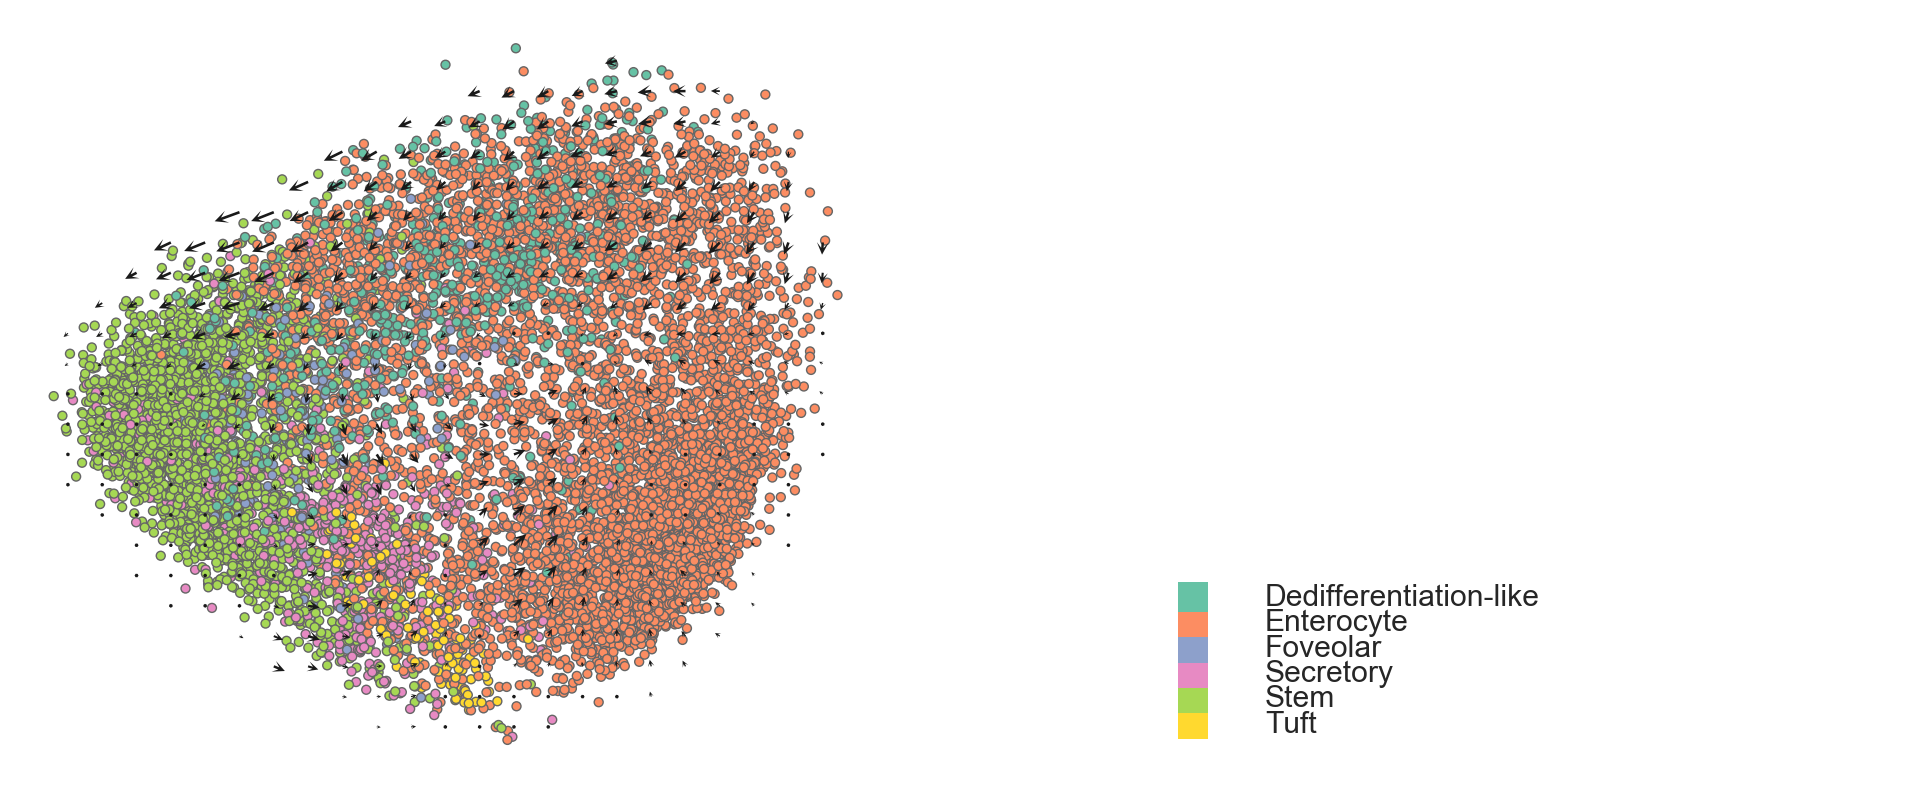

In [67]:
labels = ann_obj.ca['branch']
manual_annotation = {str(i):[i] for i in branch_names_in_order}
annotation_dict = {v:k for k, values in manual_annotation.items() for v in values }
clusters = np.array([annotation_dict[i] for i in labels])
i = 0
cluster_colors_dict = {}
for k,v in manual_annotation.items():
    cluster_colors_dict[k] = branch_colors[i]
    i+=1
ann_obj.set_clusters(clusters, cluster_colors_dict)

plt.figure(None,(17,7))
plt.subplot(121)
plt.gca().invert_xaxis()
ann_obj.plot_grid_arrows(scatter_kwargs_dict={"alpha":1, "lw":0.7, "edgecolor":"0.4", "s":20, "rasterized":True},
                     min_mass=2.9, angles='xy', scale_units='xy',
                     headaxislength=2.75, headlength=5, headwidth=4.8, quiver_scale=0.35, scale_type="absolute")
plt.subplot(122)
for zz, (k, v) in enumerate(list(cluster_colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,14)
plt.axis("off")
plt.savefig("/Users/connerkummerlowe/zambia_eed_figures/diff-comp-figure//rna_velocity_branches.pdf",transparent=True)